# Opgave III. Download filen ”Sekundære data Bolig”
<h2>Der er 2386 tilfældige respondenter fra en undersøgelse i 2012 efterår
Variabel ”Husholdnings samlede indkomst” er numerisk kontinuert, derfor frekvenstabeller ikke duer, der skal laves en histogram. Med Pivot funktion kan det styres bedre.</h2>

1) Lav histogram for husholdningden samlede månedelige indkomst, med 10.000 kr intervaller. Og maks værdi på 150.000 kr. 
Brug Grupper funktion, når du højre klikker en celle under rækkenavne:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("./Sekundær data Bolig.xlsx")

In [4]:
df

,respnr,Føler du stress for tiden?,Husholdnings samlede månedelige indkomst,Hvilken type bolig er din helårsbolig?,"Bor du i ejer-, leje- eller andelsbolig?",Den samlede værdi af husholdningens kontante opsparing i hjemmet eller banken
0,10001,Aldrig,18000,Parcelhus,Ejerbolig,90000.0
1,10002,Sjældent,60000,Parcelhus,Ejerbolig,100000.0
2,10003,Sjældent,11000,Etagebolig,Lejebolig,NaN
3,10004,Aldrig,14000,Række-/dobbelthus,Lejebolig,100000.0
4,10005,Sommetider,65000,Række-/dobbelthus,Andelsbolig,NaN
...,...,...,...,...,...,...
2381,13727,Sjældent,85000,Parcelhus,Ejerbolig,100000.0
2382,13728,Sjældent,25000,Parcelhus,Ejerbolig,NaN
2383,13729,Sjældent,40000,Parcelhus,Ejerbolig,NaN
2384,13730,Sommetider,42000,Parcelhus,Ejerbolig,NaN


In [5]:
df.columns

Index(['respnr', 'Føler du stress for tiden?',
       'Husholdnings samlede månedelige indkomst',
       'Hvilken type bolig er din helårsbolig?',
       'Bor du i ejer-, leje- eller andelsbolig?',
       'Den samlede værdi af husholdningens kontante opsparing i hjemmet eller banken'],
      dtype='object')

In [6]:
df= df.rename(columns={'respnr':'nr', 'Føler du stress for tiden?':'stres?',
       'Husholdnings samlede månedelige indkomst':'indkomst',
       'Hvilken type bolig er din helårsbolig?':'type_bolig',
       'Bor du i ejer-, leje- eller andelsbolig?':'bor/ejer',
       'Den samlede værdi af husholdningens kontante opsparing i hjemmet eller banken':'opsparing'}).copy()

# 1) Lav histogram for husholdningden samlede månedelige indkomst, med 10.000 kr intervaller. Og maks værdi på 150.000 kr. <br> Brug Grupper funktion, når du højre klikker en celle under rækkenavne:

In [7]:
df

,nr,stres?,indkomst,type_bolig,bor/ejer,opsparing
0,10001,Aldrig,18000,Parcelhus,Ejerbolig,90000.0
1,10002,Sjældent,60000,Parcelhus,Ejerbolig,100000.0
2,10003,Sjældent,11000,Etagebolig,Lejebolig,NaN
3,10004,Aldrig,14000,Række-/dobbelthus,Lejebolig,100000.0
4,10005,Sommetider,65000,Række-/dobbelthus,Andelsbolig,NaN
...,...,...,...,...,...,...
2381,13727,Sjældent,85000,Parcelhus,Ejerbolig,100000.0
2382,13728,Sjældent,25000,Parcelhus,Ejerbolig,NaN
2383,13729,Sjældent,40000,Parcelhus,Ejerbolig,NaN
2384,13730,Sommetider,42000,Parcelhus,Ejerbolig,NaN


In [8]:
histopsp = df[df['opsparing'].notna()]

In [9]:
histopsp = round(histopsp['opsparing'],2)

In [10]:
round(histopsp.describe(),2)

count       1271.00
mean      245743.67
std       433420.07
min            0.00
25%        40000.00
50%       100000.00
75%       300000.00
max      5000000.00
Name: opsparing, dtype: float64

In [11]:
histdata = round(df[df['indkomst']<=150000],2)

In [12]:
indkomstdata = round(df[df['indkomst']<=150000].describe(),2)
indkomstdata['indkomst']

count      2309.00
mean      40157.78
std       27945.24
min           0.00
25%       20000.00
50%       35500.00
75%       58000.00
max      150000.00
Name: indkomst, dtype: float64

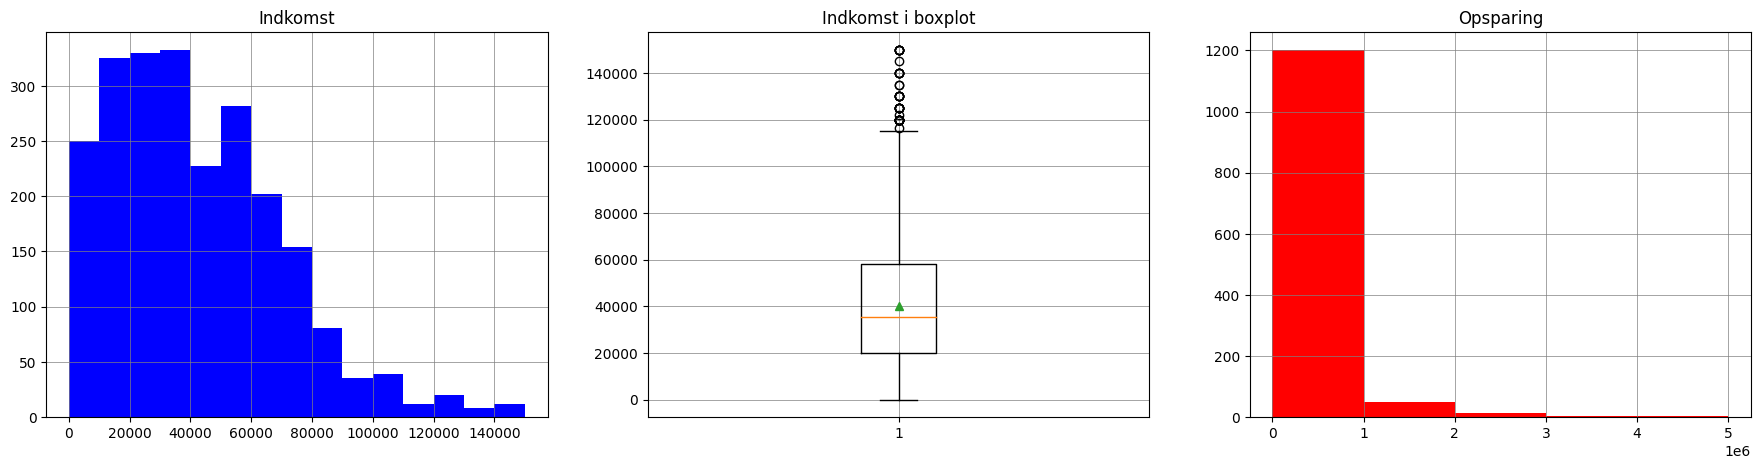

In [15]:
fig, axes = plt.subplots(1,3,figsize=(22,5))
ax = axes[0]
ax.hist(histdata['indkomst'],bins=15, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_title('Indkomst')

ax = axes[1]
ax.boxplot(histdata['indkomst'], showmeans=True)
ax.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_title('Indkomst i boxplot')

ax = axes[2]
ax.hist(histopsp.sort_values(),bins=5, color='red')
ax.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_title('Opsparing')

plt.show()